# 过滤法，嵌入法，包装法，降维算法

In [5]:
import pandas as pd
data = pd.read_csv(r"G:\临时3-8\网易云课堂《菜菜的机器学习sklearn课堂》\课件\03数据预处理和特征工程\digit recognizor.csv",
                   engine = "python"
                  )
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

x.shape

(42000, 784)

In [7]:
# from sklearn.feature_selection import VarianceThreshold
# selector  = VarianceThreshold()
# x_var0 = selector.fit_transform(x)

# x_var0.shape

In [12]:
from sklearn.feature_selection import VarianceThreshold
x_var1 = VarianceThreshold().fit_transform(x)
x_var1.shape

(42000, 708)

In [16]:
# 显示多行的执行信息
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
x.var().values #求方差

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [17]:
import numpy as np
np.median(x.var().values)

1352.286703180131

In [18]:
x_fsvar = VarianceThreshold(np.median(x.var().values)).fit_transform(x)
x_fsvar.shape

(42000, 392)

# 若特征是伯努利变量，假设p = 0.8，即二分类特征中的模中分类占到80%以上的删除特征

In [20]:
x_bvar = VarianceThreshold(.8 *(1-.8)).fit_transform(x)
x_bvar.shape

(42000, 685)

# 方差过滤对于模型的影响

In [23]:
%%timeit
# KNN 和随机森林在不同的方差效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import cross_val_score
import numpy as np
X = data.iloc[:,1:]
Y = data.iloc[:,0]

x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

577 ms ± 9.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit  # 用来判断时间的，一般会将这个cell运行7次，然后取平均值
cross_val_score(KNN(),X,Y,cv =5).mean()
时间在33mins,准确率在0.966

In [ ]:
# KNN方差过滤后
cross_val_score(KNN(),x_fsvar,y,cv = 5).mean()
# 运行时间按在20mins,准确率在 0.966

### 随机森林方差过滤前后

In [27]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import cross_val_score
import numpy as np
X = data.iloc[:,1:]
Y = data.iloc[:,0]

x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
cross_val_score(RFC(n_estimators=10,random_state=0),X,Y,cv=5).mean()
# cross_val_score(RFC(n_estimators = 10,random_state = 0),X,Y,cv =5).mean()



0.9380003861799541

In [ ]:
%%timeit
cross_val_score(RFC(n_estimators = 10,random_state = 0).X.Y.cv = 5).mean()

# 相关性过滤

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 假设我们需要寻找300个特征
x_fschi = SelectKBest(chi2,k = 300).fit_transform(x_fsvar,y)
x_fschi.shape

(42000, 300)

In [30]:
cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,Y,cv =5).mean()

0.9333098667649198

ValueError: x and y must have same first dimension, but have shapes (15,) and (19,)

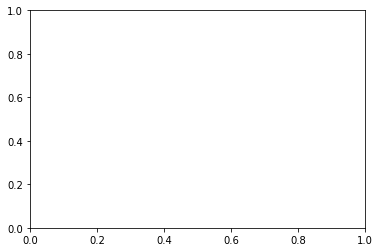

In [32]:
#  选取超参数K
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390,200,-10):
    x_fschi = SelectKBest(chi2,k = i).fit_transform(x_fsvar,Y)
    once = cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,Y,cv = 5).mean()
    score.append(once)



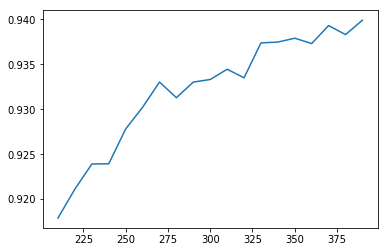

In [35]:
plt.plot(range(390,200,-10),score)
plt.show()

# F检验

In [36]:
from sklearn.feature_selection import f_classif
F,pvalues_f = f_classif(x_fsvar,y)
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [37]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [38]:
k = F.shape[0] - (pvalues_f >0.05).sum()
k

392

# 互信息法

In [42]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x_fsvar,y)
result



array([0.06926334, 0.08498449, 0.10107742, 0.10843512, 0.11559056,
       0.10729196, 0.08323433, 0.06188383, 0.07512422, 0.09286333,
       0.11889369, 0.13920229, 0.15114272, 0.16480828, 0.15534551,
       0.12947058, 0.0955128 , 0.0639924 , 0.04426148, 0.02757119,
       0.06895882, 0.09866222, 0.12587462, 0.15383637, 0.17606847,
       0.20761991, 0.22403852, 0.23555274, 0.21572341, 0.17689008,
       0.13967753, 0.10102811, 0.07377958, 0.05405815, 0.04661338,
       0.03205536, 0.06150959, 0.07694801, 0.10215508, 0.12164342,
       0.13464806, 0.14657051, 0.16223317, 0.18540368, 0.1835473 ,
       0.16939443, 0.15229394, 0.13706981, 0.11143079, 0.08677804,
       0.08029807, 0.06620011, 0.0613027 , 0.04968159, 0.06292992,
       0.07631711, 0.08236494, 0.10391558, 0.10813063, 0.10462719,
       0.10966656, 0.11462795, 0.1220979 , 0.12421024, 0.1169251 ,
       0.11481486, 0.11406134, 0.10549883, 0.09270136, 0.08146641,
       0.0688429 , 0.04071848, 0.05575064, 0.07285625, 0.07361

In [43]:
k =  result.shape[0] - sum(result <= 0)